In [1]:
# 安裝相關套件
!pip install  tensorflow
!pip install numpy
!pip install panda

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
# 引用相關套件
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [3]:
# 下載衣服的訓練和測試資料
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# 產生Label對應的類別名稱集合
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
# 建立訓練模型
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# 進行模型訓練
model.fit(train_images, train_labels, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 81us/sample - loss: 4.4033 - accuracy: 0.7304
Epoch 2/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5755 - accuracy: 0.8084
Epoch 3/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.5241 - accuracy: 0.8259
Epoch 4/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5108 - accuracy: 0.8292
Epoch 5/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4895 - accuracy: 0.8371
Epoch 6/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4848 - accuracy: 0.8390
Epoch 7/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4693 - accuracy: 0.8429
Epoch 8/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4692 - accuracy: 0.8466
Epoch 9/15
36224/60000 [=================>............] - ETA: 2s - loss: 0.4592 - accuracy: 0.8460

In [26]:
# 模型評估
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.5317 - accuracy: 0.8394

Test accuracy: 0.8394


==============測試資料=======================
測試資料 Label => 0
測試資料 類別名稱 => T-shirt/top


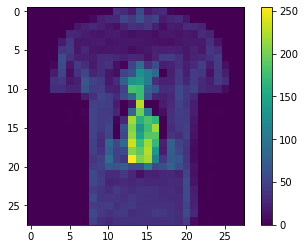

==============預測結果=======================
預測結果 Label => 0
測試結果 類別名稱 => T-shirt/top
confidence Value => 0.5110370516777039


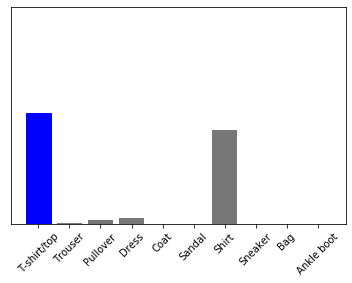

In [22]:
import random
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
def predict_single_image(i):
    # Grab an image from the test dataset.
    img = test_images[i]
    print('==============測試資料=======================')
    print('測試資料 Label => {}'.format(test_labels[i]))
    print('測試資料 類別名稱 => {}'.format(class_names[test_labels[i]]))

    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print('==============預測結果=======================')
    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img,0))
    predictions_single = probability_model.predict(img)
    print('預測結果 Label => {}'.format(np.argmax(predictions_single[0])))
    print('測試結果 類別名稱 => {}'.format(class_names[np.argmax(predictions_single[0])]))

    print('confidence Value => {}'.format(predictions_single[0][np.argmax(predictions_single[0])]))

    plot_value_array(i, predictions_single[0], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    
# 轉換為以機率分佈表示的model     
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# 隨機取出測試資料的圖片進行預測
predict_single_image(random.randrange(len(test_images)-1))